## Gradient Descent of the DL-DFT model with the magnetization density

### 1 channel input case

Imports

In [1]:
from src.training.models_adiabatic import Energy_XXZX_1input
from src.gradient_descent import GradientDescent
import torch
import numpy as np

Data

In [2]:
data=np.load('data/kohm_sham_approach/disorder/reduction_1_input_channel_dataset_h_2.7_omega_2.7_j_1_1nn_n_150000.npz')

ndata=1000

z=data['density']
f=data['density_F']
h=data['potential']
e=data['energy']

print(h.shape)
z_torch=torch.from_numpy(z[:ndata])
f_torch=torch.from_numpy(f[:ndata])
h_torch=torch.from_numpy(h[:ndata])
e_torch=torch.from_numpy(e[:ndata])


model=torch.load('model_rep/kohm_sham/disorder/model_zzxz_reduction_1_input_channel_f_h_2.7_omega_2.7_j_1_1nn_150k_unet_l_train_8_[40, 40, 40, 40, 40, 40]_hc_5_ks_1_ps_6_nconv_0_nblock',map_location='cpu')
model.eval()

(150000, 2, 8)


TDDFTadiabaticModel(
  (conv_downsample): ModuleList(
    (0): Sequential(
      (conv1): Conv1d(1, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 1): GELU()
    )
    (1): Sequential(
      (conv2): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 2): GELU()
    )
    (2): Sequential(
      (conv3): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 3): GELU()
    )
    (3): Sequential(
      (conv4): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 4): GELU()
    )
    (4): Sequential(
      (conv5): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 5): GELU()
    )
    (5): Sequential(
      (conv6): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation_6): GELU()
    )
  )
  (conv_upsample): 

Load The gradient Descent Class

In [3]:
energy=Energy_XXZX_1input(model=model)

gd=gd = GradientDescent(
    n_instances=2,
    run_name='bla',
    loglr=-1,
    n_init=z_torch,
    cut=2,
    n_ensambles=1,
    target_path='data/kohm_sham_approach/disorder/reduction_1_input_channel_dataset_h_2.7_costant_omega_1.0_j_1_1nn_n_150000.npz',
    epochs=2000,
    variable_lr=False,
    early_stopping=False,
    L=8,
    resolution=1,
    final_lr=10,
    num_threads=10,
    device='cpu',
    seed=235,
    logdiffsoglia=10,
    save=False,
    energy=energy
)

gd.run()


loading the model...
starting the cycle...


  0%|          | 0/2 [00:00<?, ?it/s]

torch.Size([1, 8])
is leaf=True


/home/ecosta/tddft_project/src/gradient_descent.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m_init = pt.mean(pt.tensor(self.n_init, dtype=pt.double), dim=0).view(


  0%|          | 0/2000 [00:00<?, ?it/s]

IndexError: too many indices for tensor of dimension 2

### Two channels input case

Imports

In [6]:
from src.training.models_adiabatic import Energy_XXZX
from src.gradient_descent import GradientDescent
import torch
import numpy as np

Data

In [9]:
data=np.load('data/kohm_sham_approach/uniform/reduction_2_input_channel_dataset_h_0.5_1.5_omega_1_j_1_1nn_n_10.npz')

ndata=10

z=data['density']
f=data['density_F']
h=data['potential']
e=data['energy']


z_torch=torch.from_numpy(z[:ndata])
f_torch=torch.from_numpy(f[:ndata])
h_torch=torch.from_numpy(h[:ndata])
e_torch=torch.from_numpy(e[:ndata])

print(h_torch)

model=torch.load('model_rep/kohm_sham/disorder/model_zzxz_reduction_2_input_channel_dataset_h_0.0-2.0_omega_0.0-2.0_j_1_1nn_n_500k_unet_l_train_8_[40, 40, 40, 40, 40, 40]_hc_5_ks_1_ps_6_nconv_0_nblock',map_location='cpu')
model.eval()

(10, 2, 8)
tensor([[[0.9135, 0.9135, 0.9135, 0.9135, 0.9135, 0.9135, 0.9135, 0.9135],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],

        [[1.1010, 1.1010, 1.1010, 1.1010, 1.1010, 1.1010, 1.1010, 1.1010],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],

        [[1.1131, 1.1131, 1.1131, 1.1131, 1.1131, 1.1131, 1.1131, 1.1131],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],

        [[0.8879, 0.8879, 0.8879, 0.8879, 0.8879, 0.8879, 0.8879, 0.8879],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],

        [[1.4662, 1.4662, 1.4662, 1.4662, 1.4662, 1.4662, 1.4662, 1.4662],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],

        [[1.2124, 1.2124, 1.2124, 1.2124, 1.2124, 1.2124, 1.2124, 1.2124],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],

        [[0.6160, 0.6160, 0.6160, 0.6160, 0.6160, 0.6160, 0.6160, 0.6160],
  

TDDFTadiabaticModel(
  (conv_downsample): ModuleList(
    (0): Sequential(
      (conv1): Conv1d(2, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 1): GELU()
    )
    (1): Sequential(
      (conv2): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 2): GELU()
    )
    (2): Sequential(
      (conv3): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 3): GELU()
    )
    (3): Sequential(
      (conv4): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 4): GELU()
    )
    (4): Sequential(
      (conv5): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation 5): GELU()
    )
    (5): Sequential(
      (conv6): Conv1d(40, 40, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=circular)
      (activation_6): GELU()
    )
  )
  (conv_upsample): 

Load The gradient Descent Class

loading the model...
starting the cycle...


  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([1, 2, 8])
is leaf=True


/home/ecosta/tddft_project/src/gradient_descent.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m_init = pt.mean(pt.tensor(self.n_init, dtype=pt.double), dim=0).view(


  0%|          | 0/50000 [00:00<?, ?it/s]

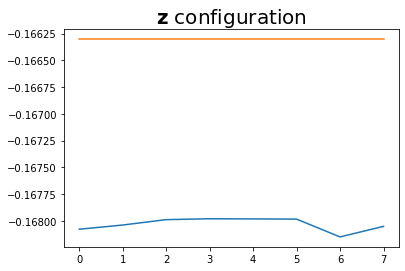

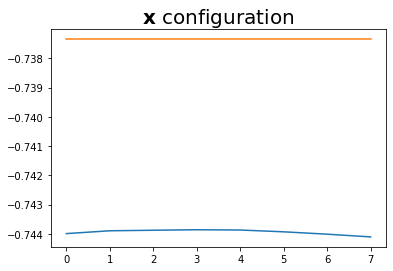

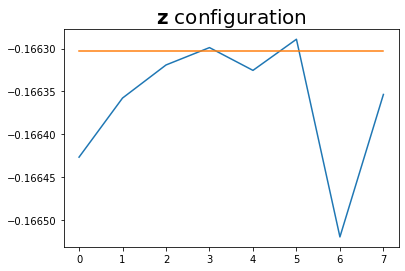

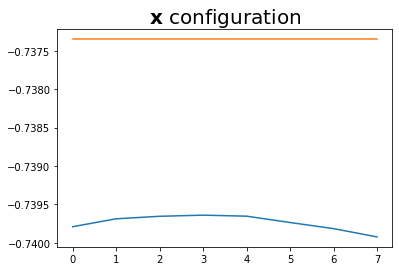

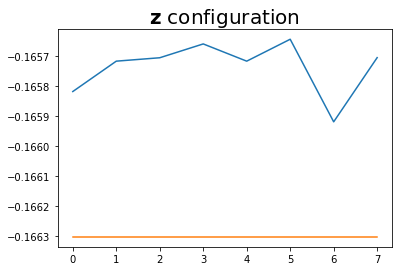

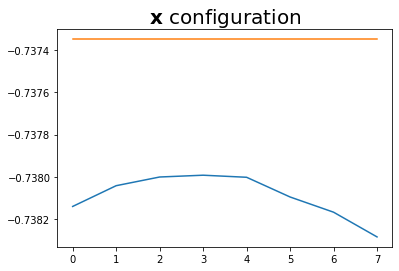

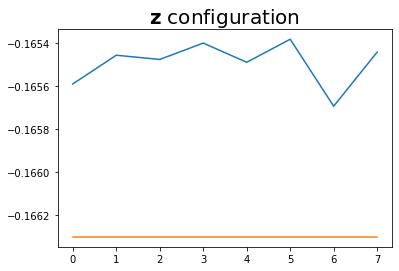

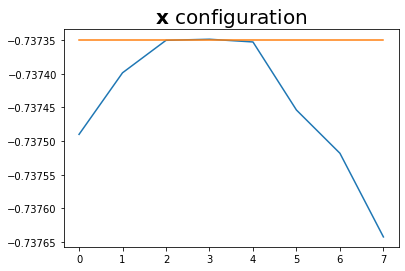

torch.Size([1, 2, 8])
is leaf=True


/home/ecosta/tddft_project/src/gradient_descent.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m_init = pt.mean(pt.tensor(self.n_init, dtype=pt.double), dim=0).view(


  0%|          | 0/50000 [00:00<?, ?it/s]

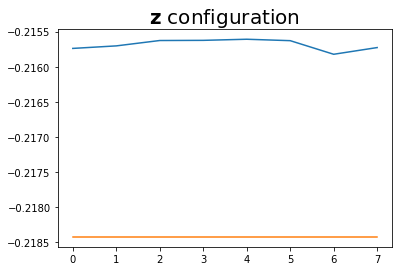

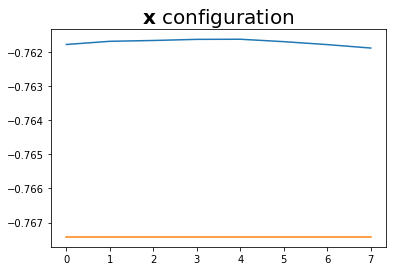

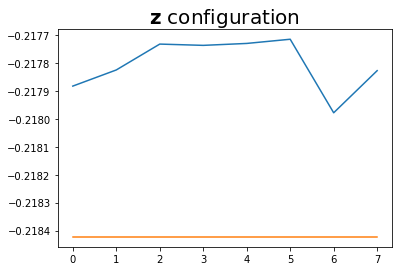

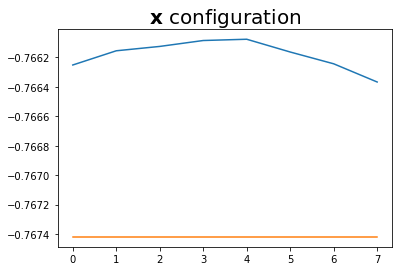

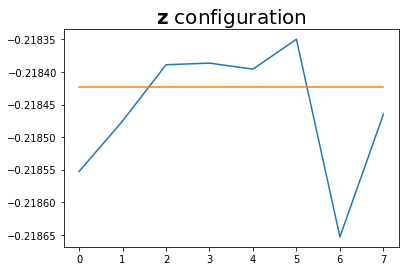

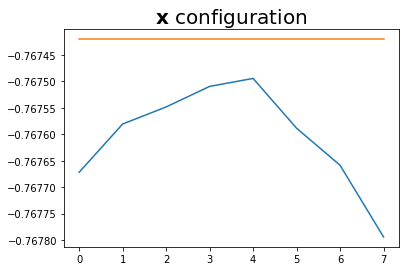

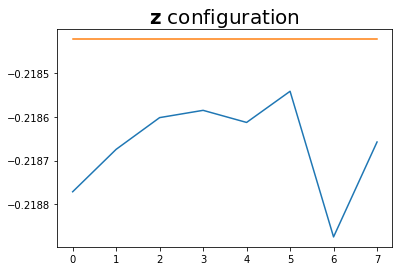

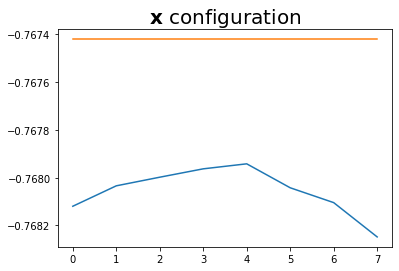

torch.Size([1, 2, 8])
is leaf=True


/home/ecosta/tddft_project/src/gradient_descent.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m_init = pt.mean(pt.tensor(self.n_init, dtype=pt.double), dim=0).view(


  0%|          | 0/50000 [00:00<?, ?it/s]

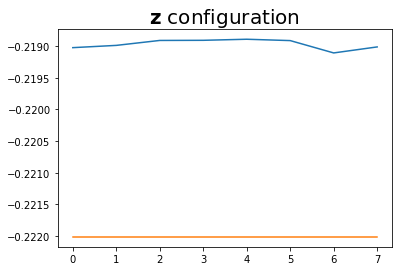

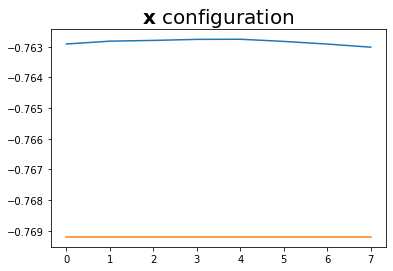

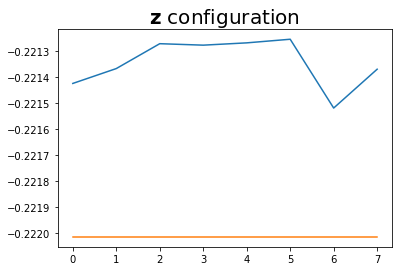

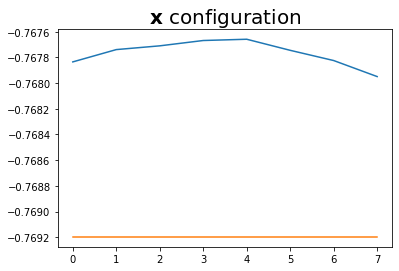

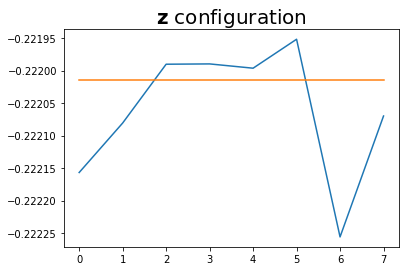

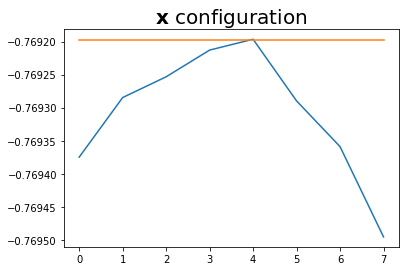

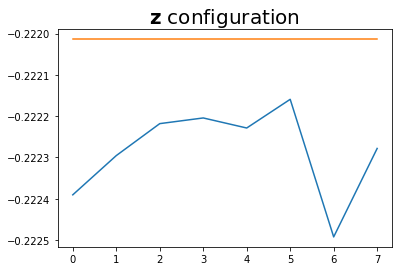

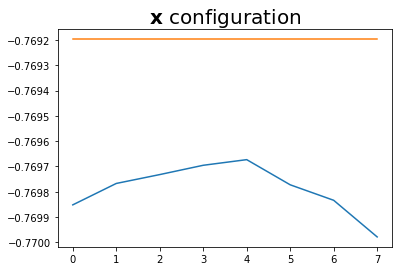

torch.Size([1, 2, 8])
is leaf=True


/home/ecosta/tddft_project/src/gradient_descent.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m_init = pt.mean(pt.tensor(self.n_init, dtype=pt.double), dim=0).view(


  0%|          | 0/50000 [00:00<?, ?it/s]

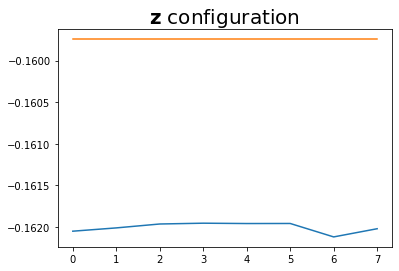

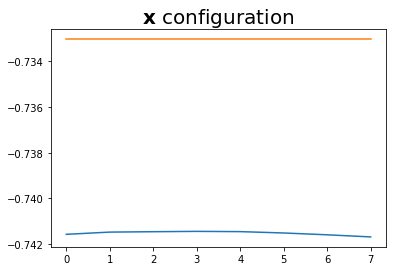

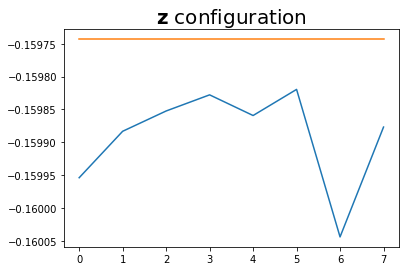

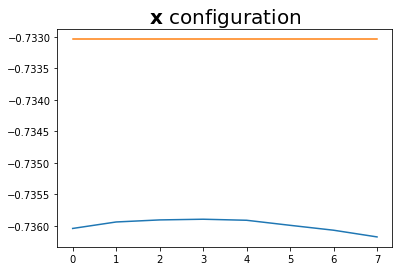

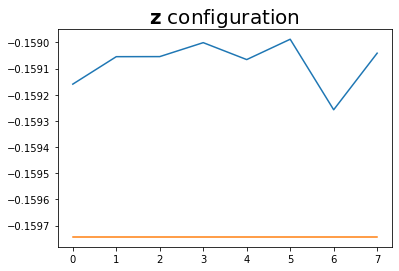

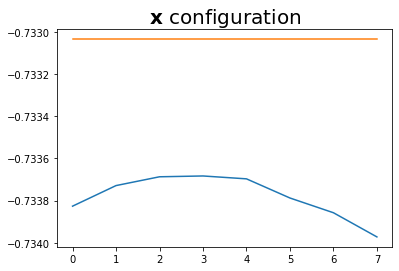

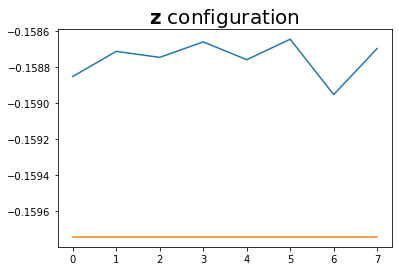

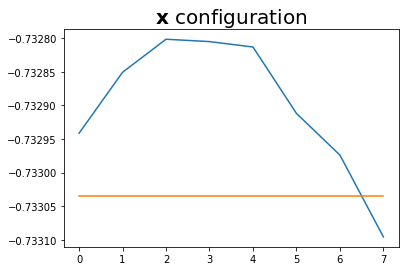

torch.Size([1, 2, 8])
is leaf=True


/home/ecosta/tddft_project/src/gradient_descent.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m_init = pt.mean(pt.tensor(self.n_init, dtype=pt.double), dim=0).view(


  0%|          | 0/50000 [00:00<?, ?it/s]

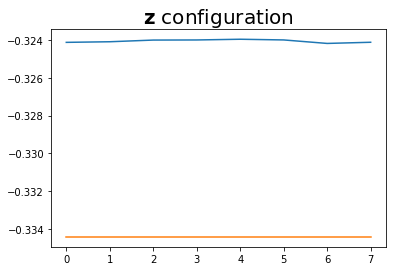

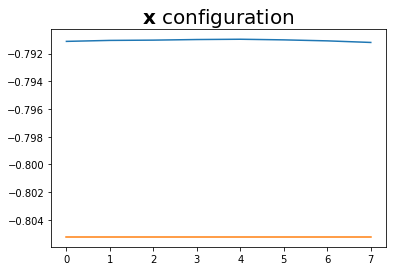

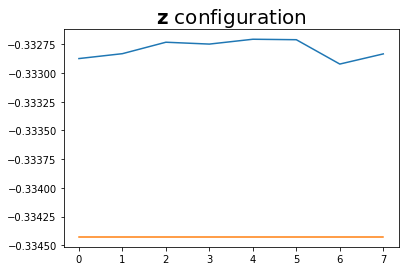

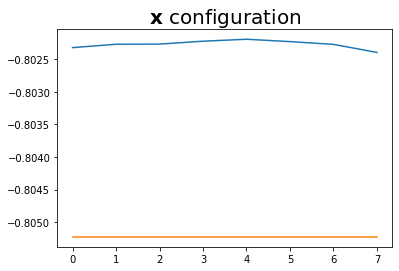

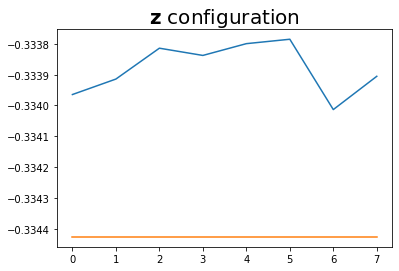

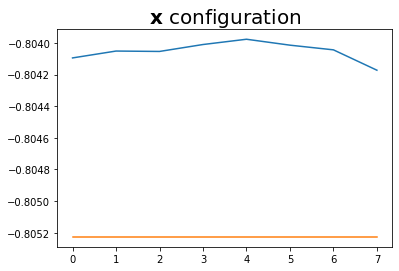

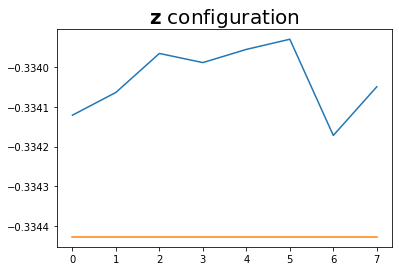

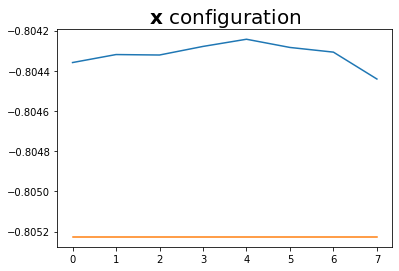

In [8]:
energy=Energy_XXZX(model=model)

gd=gd = GradientDescent(
    n_instances=5,
    run_name='bla',
    loglr=-3,
    n_init=z_torch,
    cut=2,
    n_ensambles=1,
    target_path='data/kohm_sham_approach/uniform/reduction_2_input_channel_dataset_h_0.5_1.5_omega_1_j_1_1nn_n_10.npz',
    epochs=50000,
    variable_lr=False,
    early_stopping=False,
    L=8,
    resolution=1,
    final_lr=10,
    num_threads=10,
    device='cpu',
    seed=235,
    logdiffsoglia=10,
    save=False,
    energy=energy
)

gd.run()
